In [53]:
%run Functions.py

In [54]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg, minimize
import sys
sys.path.insert(0,'/home/zahra/PIPELINE')
import scipy as sp
from LogCal_code import Logcal_solutions # I included this code here on GitHub as well

In [55]:
m = manager.ProductManager.from_config('/home/zahra/PIPELINE/8by8_no_sims/prod_params_custom.yaml') 

t = m.telescope
Nfeeds,_= t.feedpositions.shape
Ndish = np.int(Nfeeds/2)
Nbls = np.int(Ndish*(Ndish-1)/2)

Product directory: /home/zahra/PIPELINE/8by8_no_sims/bt_matrices


In [56]:
S_max =  5 * 12 * 1.e-6 * np.sqrt(1024./Ndish)
sigma = S_max*0.01

In [57]:
Vis_bright_sources = np.load('Vis_bright_sources_6Aug_flux_1Jy_10Jy.npy')
Vis_poisson = np.load('Vis_poisson_6Aug.npy')

In [58]:
Vis_total = Vis_poisson + Vis_bright_sources

In [60]:
gain = np.ones(Ndish)
sim_gains = np.ones(2*Ndish)
sim_gains[::2] = gain.real
sim_gains[1::2] = gain.imag

In [62]:
rec_gains = recovered_gains(500)

0
[0.99597978 0.99433981 1.01271443 1.00741259 0.99058416 0.99804878
 1.00796613 1.00244439 1.00024417 1.00146592 1.00618359 1.00164931
 0.99646622 1.00281156 1.00446551 0.99926785 1.0032401  1.0044042
 0.99987794 0.99932884 0.99823155 1.00293398 1.00268916 0.99719632
 1.00232203 0.99969487 0.99549358 1.00281156 1.00397517 0.99853623
 0.99938983 1.00409773 1.00256677 0.99743981 0.99725719 1.00507877
 1.00477209 0.99597978 1.00091595 1.00360757 1.00287277 0.99112845
 1.         1.0029952  0.99658787 0.99725719 1.00606077 0.99902391
 1.00012208 1.00839687 0.99719632 0.9981097  1.00348506 0.99993897
 0.99987794 1.00079377 0.99634459 1.00495609 0.99610137 0.99847528
 1.00728962 0.99549358 0.99689205 0.99938983]
1
[0.99610137 0.99500762 1.0131472  1.00747408 0.99070509 0.99792696
 1.00765857 1.00275036 0.99981691 1.00146592 1.00599937 1.00140479
 0.99585821 1.00275036 1.00495609 0.99871908 1.00219968 1.00379135
 1.00018312 0.99932884 0.99829248 1.00336257 1.00232203 0.99774425
 1.00287277 0

[0.9945826  0.99349052 1.01228184 1.00661357 0.9898589  0.99829248
 1.00722815 1.00250558 0.998841   1.00024417 1.00514012 1.0004884
 0.99555434 1.00268916 1.00415902 0.99841434 1.00171045 1.00354631
 0.99902391 0.99847528 0.99719632 1.00287277 1.00183273 0.99677036
 1.00213851 0.99896294 0.99397574 1.00152704 1.00336257 0.99719632
 0.99768335 1.00219968 1.00158817 0.99677036 0.99658787 1.0044042
 1.00409773 0.99567588 1.00030522 1.0029952  1.00244439 0.99112845
 0.99896294 1.00238321 0.99585821 0.99591899 1.0042816  0.99774425
 0.99914587 1.00796613 0.99634459 0.99768335 1.00226085 0.99914587
 0.99853623 0.99963386 0.99597978 1.00409773 0.99579743 0.99756157
 1.00655213 0.9945826  0.9964054  0.99780515]
13
[0.99494689 0.99349052 1.01147896 1.0064907  0.98925492 0.99725719
 1.00630642 1.00201619 0.99945083 0.99993897 1.00495609 1.00036628
 0.9945826  1.00226085 1.00415902 0.99798787 1.00177159 1.00262796
 0.99878004 0.99853623 0.99689205 1.00262796 1.00177159 0.99695289
 1.00134368 0.9

[0.99421844 0.99233907 1.01061503 1.00550828 0.9890738  0.9968312
 1.00599937 1.00134368 0.99823155 0.99908489 1.0042816  1.00012208
 0.9945219  1.00134368 1.00366882 0.99756157 1.00116034 1.00207735
 0.99908489 0.99792696 0.99610137 1.00281156 1.00085486 0.99549358
 1.00128256 0.99762246 0.99282372 1.00079377 1.00275036 0.99731806
 0.99713546 1.00262796 1.00079377 0.99561511 0.99585821 1.00415902
 1.00348506 0.99379375 0.99945083 1.00207735 1.00146592 0.98979849
 0.99804878 1.00146592 0.99476473 0.99591899 1.00452682 0.99567588
 0.99780515 1.00741259 0.99506835 0.99701375 1.00146592 0.99756157
 0.99829248 0.99938983 0.9946433  1.00311764 0.99476473 0.99652704
 1.00538554 0.99342988 0.99591899 0.99750069]
25
[0.99385441 0.993248   1.01086179 1.00593797 0.98913417 0.99689205
 1.00520147 1.0004884  0.99859718 0.99902391 1.00501743 0.99908489
 0.99476473 1.00134368 1.00311764 0.99750069 1.00128256 1.00232203
 0.99804878 0.99750069 0.99652704 1.00238321 1.00067161 0.99543282
 1.00116034 0.

[0.9944005  0.99421844 1.01222006 1.00636785 0.99034235 0.9981097
 1.00741259 1.00268916 0.99945083 1.00012208 1.00501743 1.00097704
 0.99494689 1.00232203 1.00458813 0.99871908 1.00256677 1.00336257
 1.00006104 0.99945083 0.99768335 1.0029952  1.00207735 0.99689205
 1.00262796 0.99890197 0.99506835 1.00177159 1.00379135 0.99841434
 0.99786605 1.00354631 1.00128256 0.99689205 0.99628378 1.0042816
 1.00464945 0.99628378 1.00073269 1.00262796 1.00226085 0.99106796
 0.99920686 1.00293398 0.99658787 0.99695289 1.00501743 0.99762246
 0.99932884 1.00821225 0.99670953 0.99768335 1.00293398 0.99835341
 0.99945083 1.00012208 0.9964054  1.0044042  0.99591899 0.99786605
 1.00618359 0.99415776 0.99701375 0.99829248]
37
[0.99470401 0.99355116 1.0129617  1.00698227 0.99058416 0.99713546
 1.0071052  1.00171045 0.99957285 1.00042734 1.00563103 1.00109924
 0.99537207 1.00195503 1.00391389 0.99841434 1.00262796 1.00397517
 0.99878004 0.99859718 0.99750069 1.00201619 1.00171045 0.9964054
 1.00232203 0.99

[0.99397574 0.99312676 1.01135549 1.00575379 0.98871166 0.99646622
 1.00599937 1.00152704 0.99835341 0.99969487 1.00532418 1.
 0.9944612  1.00146592 1.0032401  0.99792696 1.00171045 1.00207735
 0.99902391 0.99835341 0.99664869 1.00213851 1.00097704 0.99597978
 1.00213851 0.99804878 0.99403641 1.00122145 1.00226085 0.9970746
 0.9970746  1.00268916 1.00036628 0.99604057 0.99573665 1.00373008
 1.00391389 0.9945826  0.99951184 1.00158817 1.00128256 0.99010059
 0.9981097  1.00183273 0.99518983 0.99567588 1.00471077 0.99652704
 0.99871908 1.00722815 0.99531132 0.9970746  1.00201619 0.99725719
 0.9981097  0.99908489 0.9945219  1.0032401  0.99500762 0.99689205
 1.00581518 0.99385441 0.99561511 0.99798787]
49
[0.99677036 0.99543282 1.01364202 1.0078431  0.99161252 0.99914587
 1.00919731 1.00385262 1.00158817 1.00177159 1.00685936 1.0029952
 0.99689205 1.00397517 1.00575379 1.00085486 1.00360757 1.00550828
 1.00097704 1.00054947 0.99920686 1.00446551 1.00373008 0.99865813
 1.00415902 1.00073269 

[0.99591899 0.9945826  1.01252901 1.0078431  0.99034235 0.99804878
 1.00778159 1.00250558 1.00006104 1.00018312 1.00569241 1.00128256
 0.99628378 1.00226085 1.00501743 0.99878004 1.00256677 1.0044042
 1.00006104 0.99945083 0.99768335 1.00397517 1.00256677 0.99737893
 1.00281156 0.99902391 0.99470401 1.00213851 1.00409773 0.99859718
 0.99823155 1.00366882 1.00152704 0.99713546 0.99670953 1.00538554
 1.00526282 0.9964054  1.00067161 1.0032401  1.00330134 0.99124945
 1.00018312 1.00244439 0.99664869 0.9968312  1.00599937 0.99750069
 0.99938983 1.00888938 0.99701375 0.99762246 1.00281156 0.99951184
 0.99993897 1.00097704 0.99591899 1.00464945 0.99689205 0.99804878
 1.00673646 0.9946433  0.9968312  0.99878004]
61
[0.99179411 0.99149148 1.00851998 1.00385262 0.98678246 0.99427912
 1.00348506 0.99951184 0.99616217 0.99677036 1.00183273 0.99792696
 0.99239964 0.99890197 1.00091595 0.99585821 0.99951184 0.99993897
 0.99677036 0.99573665 0.99433981 0.99932884 0.99890197 0.99306614
 0.99890197 0.

[0.9944612  0.99427912 1.01110861 1.00599937 0.98979849 0.99768335
 1.00587657 1.00158817 0.99932884 0.99957285 1.00501743 1.00061054
 0.99525057 1.00195503 1.00385262 0.99804878 1.00128256 1.00330134
 0.99963386 0.99878004 0.99762246 1.00232203 1.00183273 0.99585821
 1.00152704 0.99853623 0.99355116 1.00097704 1.0029952  0.99695289
 0.99713546 1.00262796 1.00140479 0.99677036 0.99567588 1.0043429
 1.00397517 0.99482545 0.99987794 1.00250558 1.00146592 0.98991932
 0.99908489 1.00189388 0.99561511 0.99610137 1.00415902 0.99646622
 0.99963386 1.00778159 0.99525057 0.99725719 1.00201619 0.99780515
 0.99780515 0.99902391 0.99512909 1.00366882 0.99518983 0.99664869
 1.00612218 0.99336925 0.99646622 0.99780515]
73
[0.99476473 0.99403641 1.0120965  1.00624501 0.98883236 0.99774425
 1.00716667 1.00201619 0.99951184 1.         1.00544691 1.00024417
 0.99531132 1.00213851 1.00379135 0.99859718 1.00177159 1.00354631
 0.99969487 0.99847528 0.9970746  1.00275036 1.00244439 0.99646622
 1.00207735 0.

[0.99531132 0.99427912 1.01283806 1.00698227 0.98991932 0.99823155
 1.00753557 1.00238321 0.99993897 1.00079377 1.00563103 1.00109924
 0.99567588 1.00311764 1.00489475 0.99914587 1.00281156 1.00415902
 0.99987794 0.99926785 0.99701375 1.00268916 1.00219968 0.99750069
 1.00219968 0.99938983 0.99470401 1.00268916 1.00366882 0.99890197
 0.9981097  1.00317887 1.00195503 0.99762246 0.99689205 1.00489475
 1.00538554 0.99597978 1.00116034 1.00305642 1.00275036 0.99106796
 0.99975589 1.00219968 0.9964054  0.99664869 1.00532418 0.99792696
 0.99993897 1.00796613 0.99677036 0.99786605 1.00250558 0.99847528
 0.99920686 0.99981691 0.99610137 1.00452682 0.99664869 0.99786605
 1.00630642 0.99531132 0.99743981 0.99908489]
85
[0.99500762 0.99403641 1.0115407  1.00655213 0.98961726 0.99695289
 1.00655213 1.00219968 0.99963386 1.00012208 1.00544691 1.00012208
 0.99579743 1.00232203 1.00422031 0.99890197 1.00232203 1.00360757
 1.00024417 0.99841434 0.99725719 1.00244439 1.00146592 0.99634459
 1.00213851 0

[0.99634459 0.99482545 1.01370389 1.00778159 0.99112845 0.99829248
 1.00802766 1.00262796 0.99975589 1.00116034 1.00538554 1.00158817
 0.99616217 1.00219968 1.00483342 0.99926785 1.00354631 1.00422031
 1.00091595 0.99975589 0.99829248 1.00391389 1.00256677 0.99756157
 1.00256677 0.99951184 0.99518983 1.00262796 1.00422031 0.99865813
 0.99908489 1.0044042  1.00287277 0.99817062 0.99768335 1.00624501
 1.00550828 0.99604057 1.00140479 1.00403644 1.00366882 0.99197573
 0.99981691 1.0032401  0.99701375 0.9970746  1.00563103 0.99756157
 1.00012208 1.00827379 0.99743981 0.99841434 1.00317887 0.99938983
 1.         1.00091595 0.99713546 1.00520147 0.9968312  0.99920686
 1.00728962 0.99482545 0.99743981 0.99902391]
97
[0.99725719 0.99610137 1.01370389 1.00895096 0.99197573 0.99920686
 1.00864309 1.00379135 1.00097704 1.00232203 1.00698227 1.00244439
 0.9968312  1.00391389 1.00606077 0.99969487 1.00354631 1.00507877
 1.00091595 1.00061054 0.99908489 1.0042816  1.00397517 0.99847528
 1.00409773 1

[0.99591899 0.99537207 1.01289988 1.00759707 0.9905237  0.99896294
 1.00802766 1.00379135 1.00079377 1.00152704 1.00642927 1.00189388
 0.99597978 1.00342382 1.00563103 0.99914587 1.00354631 1.0043429
 1.00116034 1.00012208 0.99890197 1.0043429  1.00281156 0.99756157
 1.00391389 1.00012208 0.99573665 1.00281156 1.00452682 0.99908489
 0.99963386 1.00422031 1.00275036 0.99859718 0.99774425 1.00575379
 1.00593797 0.99701375 1.00152704 1.0043429  1.00342382 0.9922785
 1.00036628 1.00342382 0.9970746  0.99798787 1.0067979  0.99841434
 1.00018312 1.00888938 0.99737893 0.99902391 1.00379135 1.
 1.00024417 1.00134368 0.99695289 1.00544691 0.99677036 0.99902391
 1.00747408 0.99597978 0.99762246 0.99981691]
109
[0.99500762 0.9946433  1.01271443 1.00716667 0.99064462 0.99774425
 1.00735111 1.00281156 0.99920686 1.00116034 1.00618359 1.00152704
 0.99573665 1.00207735 1.00446551 0.99908489 1.0029952  1.00409773
 0.99951184 0.99969487 0.99762246 1.00317887 1.00207735 0.99670953
 1.00244439 0.99920686

[0.9944005  0.99264195 1.0110469  1.00606077 0.98859097 0.9964054
 1.00618359 1.00146592 0.99914587 0.99969487 1.00514012 1.
 0.99415776 1.00134368 1.00293398 0.99768335 1.00085486 1.00226085
 0.99841434 0.9981097  0.99658787 1.00152704 1.00103814 0.99616217
 1.00189388 0.99792696 0.99355116 1.0004884  1.00275036 0.99713546
 0.99737893 1.00250558 1.00128256 0.99585821 0.99616217 1.00422031
 1.00409773 0.99506835 0.99981691 1.00152704 1.00109924 0.99064462
 0.99847528 1.00097704 0.9946433  0.99518983 1.0044042  0.99652704
 0.99841434 1.00642927 0.99567588 0.99670953 1.00116034 0.99841434
 0.99853623 0.99890197 0.99488617 1.00330134 0.99488617 0.99646622
 1.00556965 0.9936118  0.99610137 0.99737893]
121
[0.99409708 0.99306614 1.01049167 1.00606077 0.98871166 0.99670953
 1.00630642 1.00158817 0.99871908 0.99920686 1.00471077 1.00018312
 0.99488617 1.00158817 1.00342382 0.99677036 1.00164931 1.00268916
 0.99823155 0.99865813 0.99628378 1.00152704 1.00158817 0.99555434
 1.00183273 0.9979269

[0.99367245 0.99330862 1.01166418 1.00612218 0.98961726 0.99652704
 1.00544691 1.00103814 0.99938983 0.99975589 1.00397517 1.
 0.99427912 1.00158817 1.00330134 0.99817062 1.00164931 1.00250558
 0.99896294 0.99780515 0.99677036 1.00201619 1.00122145 0.99610137
 1.00177159 0.99817062 0.99385441 1.0004884  1.00250558 0.99689205
 0.99756157 1.00293398 1.00109924 0.9968312  0.99567588 1.00397517
 1.00403644 0.99488617 0.99969487 1.00244439 1.00232203 0.99010059
 0.99817062 1.00146592 0.99537207 0.99537207 1.00483342 0.99616217
 0.99829248 1.0071052  0.99561511 0.99628378 1.00213851 0.99804878
 0.99768335 0.99926785 0.9945826  1.00268916 0.99518983 0.99689205
 1.00599937 0.9936118  0.99610137 0.99798787]
133
[0.99494689 0.99409708 1.01302353 1.0071052  0.98997974 0.99756157
 1.00692081 1.00201619 0.99963386 0.99981691 1.00556965 1.00140479
 0.99610137 1.00256677 1.00446551 0.99920686 1.00262796 1.00354631
 0.99926785 0.99975589 0.99756157 1.00330134 1.00219968 0.99628378
 1.00293398 0.998231

[0.99537207 0.99421844 1.01240542 1.00673646 0.99004017 0.99713546
 1.00735111 1.00207735 1.00042734 0.99963386 1.00550828 1.00061054
 0.99561511 1.00226085 1.0044042  0.99908489 1.00152704 1.00330134
 0.99987794 0.99926785 0.99762246 1.00317887 1.00226085 0.99628378
 1.00226085 0.99920686 0.99379375 1.00201619 1.00293398 0.99835341
 0.99798787 1.00348506 1.00238321 0.99756157 0.99646622 1.00489475
 1.00483342 0.99543282 1.00042734 1.00238321 1.00330134 0.99088651
 0.99963386 1.00250558 0.99628378 0.99719632 1.00520147 0.99695289
 0.99945083 1.00851998 0.99652704 0.99829248 1.00232203 0.99878004
 0.99993897 0.99938983 0.99610137 1.00446551 0.99634459 0.99841434
 1.00642927 0.99409708 0.99701375 0.99878004]
145
[0.99537207 0.99433981 1.01259081 1.00747408 0.99118895 0.99817062
 1.00753557 1.00305642 1.00024417 1.00079377 1.00612218 1.00201619
 0.99585821 1.00281156 1.00544691 0.99890197 1.00330134 1.0042816
 1.00024417 0.99957285 0.99817062 1.00354631 1.00256677 0.99756157
 1.00366882 0

[0.99786605 0.99658787 1.01506598 1.00858153 0.99270254 1.00067161
 1.00975183 1.00514012 1.00226085 1.00250558 1.00796613 1.00373008
 0.99829248 1.0043429  1.00685936 1.00067161 1.00501743 1.00624501
 1.00232203 1.00134368 0.99963386 1.00556965 1.00507877 0.99914587
 1.00446551 1.00158817 0.99737893 1.0042816  1.00575379 1.00079377
 1.00079377 1.00581518 1.00446551 0.99957285 0.99945083 1.0071052
 1.00802766 0.99847528 1.00305642 1.00556965 1.00477209 0.99336925
 1.00134368 1.00489475 0.99878004 0.998841   1.00864309 1.00012208
 1.00140479 1.01098519 0.99865813 0.99969487 1.00544691 1.00091595
 1.00183273 1.00207735 0.99853623 1.00667501 0.99932884 1.00012208
 1.0088278  0.99731806 0.99908489 1.00140479]
157
[0.99385441 0.99276313 1.0107384  1.00599937 0.98901343 0.99701375
 1.00593797 1.00079377 0.99817062 0.99878004 1.00464945 0.99957285
 0.99482545 1.00067161 1.00342382 0.99750069 1.00189388 1.00213851
 0.99859718 0.99792696 0.99549358 1.00171045 1.00091595 0.99518983
 1.00177159 0

[0.99318737 0.991552   1.00993674 1.0044042  0.98822901 0.99604057
 1.00514012 1.00036628 0.99786605 0.99817062 1.00311764 0.99902391
 0.9936118  1.00036628 1.00262796 0.99658787 1.00042734 1.00128256
 0.99750069 0.99750069 0.99561511 1.00085486 1.00006104 0.9945219
 1.00164931 0.9968312  0.99215738 1.00012208 1.00201619 0.99628378
 0.99622297 1.00189388 0.99963386 0.99549358 0.9945219  1.00268916
 1.00256677 0.99330862 0.99902391 1.00103814 1.00042734 0.98913417
 0.99719632 1.         0.9944005  0.99433981 1.00342382 0.99585821
 0.99743981 1.00563103 0.9945219  0.99591899 1.00061054 0.9970746
 0.99689205 0.99780515 0.9944005  1.00207735 0.99397574 0.99616217
 1.00483342 0.99318737 0.99500762 0.9968312 ]
169
[0.99500762 0.9946433  1.01222006 1.00692081 0.99022146 0.99780515
 1.00747408 1.00275036 0.99951184 1.0004884  1.00587657 1.00061054
 0.99585821 1.00281156 1.00422031 0.99871908 1.00183273 1.00330134
 0.99969487 0.998841   0.99719632 1.00275036 1.00201619 0.99670953
 1.00201619 0.

[0.9945219  0.99330862 1.01129377 1.00630642 0.98967767 0.99689205
 1.00618359 1.00134368 0.99981691 0.99908489 1.00489475 1.00012208
 0.99518983 1.00177159 1.00385262 0.99841434 1.00195503 1.0032401
 0.99847528 0.99774425 0.99622297 1.00201619 1.00122145 0.99579743
 1.00232203 0.99841434 0.99391507 1.00073269 1.00244439 0.99725719
 0.99823155 1.00268916 1.00085486 0.99664869 0.99537207 1.00477209
 1.00446551 0.99567588 0.99981691 1.00219968 1.00232203 0.99094699
 0.99847528 1.00134368 0.99549358 0.99652704 1.00495609 0.99652704
 0.99847528 1.0064907  0.99561511 0.99689205 1.00183273 0.99786605
 0.99847528 0.99914587 0.99500762 1.00385262 0.99512909 0.99677036
 1.00538554 0.9937331  0.99677036 0.99731806]
181
[0.99349052 0.99221794 1.01049167 1.00495609 0.98828932 0.99549358
 1.00581518 1.00042734 0.99780515 0.99896294 1.00403644 0.99945083
 0.9937331  1.0004884  1.00226085 0.99743981 1.00122145 1.00177159
 0.99786605 0.99768335 0.99604057 1.00109924 1.00042734 0.99476473
 1.00067161 0

[0.9944612  0.99349052 1.01129377 1.00606077 0.98913417 0.99731806
 1.00612218 1.00164931 0.99914587 0.99926785 1.00458813 1.0004884
 0.99500762 1.00146592 1.00366882 0.99841434 1.00207735 1.00256677
 0.99841434 0.99871908 0.99652704 1.00201619 1.00158817 0.99658787
 1.00164931 0.99896294 0.99355116 1.00097704 1.0032401  0.99743981
 0.99786605 1.0029952  1.00067161 0.99597978 0.99616217 1.00464945
 1.00354631 0.99500762 0.99938983 1.00262796 1.00158817 0.99082603
 0.99859718 1.00183273 0.99597978 0.99579743 1.00471077 0.9964054
 0.99871908 1.00753557 0.99604057 0.99725719 1.00219968 0.99743981
 0.99878004 0.99902391 0.99518983 1.0043429  0.99531132 0.99677036
 1.00599937 0.99379375 0.99634459 0.99786605]
193
[0.99756157 0.99658787 1.01481819 1.0098751  0.99300553 1.00042734
 1.00907413 1.00477209 1.00219968 1.00281156 1.00790461 1.00317887
 0.99841434 1.00379135 1.0067979  1.00140479 1.00507877 1.00618359
 1.00226085 1.00152704 1.00012208 1.00520147 1.0043429  0.99902391
 1.00483342 1.

[0.99549358 0.99415776 1.01246721 1.00692081 0.9902819  0.99780515
 1.00698227 1.00195503 0.99963386 1.00054947 1.00520147 1.00146592
 0.99549358 1.00262796 1.00471077 0.998841   1.00244439 1.00397517
 0.99957285 0.99926785 0.99792696 1.00293398 1.00262796 0.99646622
 1.00213851 0.99871908 0.9945219  1.00146592 1.00336257 0.99786605
 0.99841434 1.00317887 1.00201619 0.99792696 0.99670953 1.00501743
 1.00452682 0.99561511 1.00073269 1.00317887 1.00219968 0.99088651
 0.99890197 1.00226085 0.99616217 0.9970746  1.00544691 0.99774425
 0.99945083 1.00839687 0.99731806 0.99719632 1.00256677 0.99853623
 0.99932884 1.00036628 0.99537207 1.00471077 0.99585821 0.99780515
 1.0064907  0.99397574 0.99756157 0.99798787]
205
[0.9945219  0.99355116 1.0120965  1.00612218 0.98979849 0.99762246
 1.00667501 1.00305642 0.99914587 0.99993897 1.00501743 1.00054947
 0.99579743 1.00268916 1.00415902 0.99878004 1.00189388 1.00373008
 0.99896294 0.99920686 0.9981097  1.00287277 1.00195503 0.99719632
 1.00232203 

[0.99701375 0.99555434 1.01432279 1.00735111 0.99161252 0.99987794
 1.00839687 1.00336257 1.00116034 1.00177159 1.00741259 1.00232203
 0.99695289 1.00458813 1.00593797 1.00030522 1.00403644 1.00514012
 1.00183273 1.00042734 0.99908489 1.00415902 1.00317887 0.99823155
 1.0044042  1.00134368 0.99573665 1.00360757 1.00520147 0.99987794
 1.00006104 1.00501743 1.00336257 0.99859718 0.99835341 1.00667501
 1.00587657 0.99743981 1.00201619 1.00415902 1.0043429  0.99246021
 1.00122145 1.00403644 0.99774425 0.99786605 1.00698227 0.99841434
 1.00207735 1.0096902  0.99743981 0.99951184 1.00409773 1.00024417
 1.00079377 1.00103814 0.99768335 1.00593797 0.99786605 1.00012208
 1.00839687 0.99610137 0.99804878 0.99963386]
217
[0.9944612  0.99270254 1.01135549 1.00618359 0.9893153  0.99695289
 1.00618359 1.00171045 0.99938983 0.99951184 1.00477209 0.99963386
 0.99525057 1.00189388 1.00354631 0.99737893 1.00201619 1.00262796
 0.99859718 0.99792696 0.9964054  1.00195503 1.00073269 0.99531132
 1.00232203 

[0.99628378 0.99585821 1.01345643 1.00870466 0.99130995 0.99890197
 1.00870466 1.00379135 1.00207735 1.00134368 1.00704373 1.00317887
 0.99689205 1.00415902 1.00636785 1.00042734 1.0042816  1.00483342
 1.00146592 1.00018312 0.99920686 1.00452682 1.0032401  0.99841434
 1.00458813 1.00054947 0.99628378 1.00287277 1.00550828 0.99975589
 0.99945083 1.00514012 1.00330134 0.99871908 0.99841434 1.00618359
 1.00673646 0.99737893 1.00256677 1.0043429  1.00397517 0.99252079
 1.00116034 1.00379135 0.9970746  0.99756157 1.00728962 0.99975589
 1.00134368 1.00907413 0.99817062 0.99963386 1.00342382 1.00024417
 1.00109924 1.00146592 0.99713546 1.00642927 0.99743981 0.99981691
 1.00827379 0.99634459 0.99859718 1.00036628]
229
[0.99591899 0.9944612  1.01203473 1.00735111 0.99106796 0.99774425
 1.00802766 1.00262796 1.00030522 1.00079377 1.00655213 1.00189388
 0.99610137 1.00293398 1.00483342 0.99987794 1.00293398 1.0042816
 1.         1.00036628 0.99847528 1.00403644 1.00262796 0.99774425
 1.0032401  0

[0.99409708 0.99288432 1.01110861 1.00612218 0.9893153  0.99737893
 1.00606077 1.00195503 0.99945083 0.99957285 1.00477209 1.00018312
 0.99500762 1.00183273 1.00385262 0.99847528 1.00195503 1.00262796
 0.99853623 0.99853623 0.99695289 1.00219968 1.00152704 0.99616217
 1.00158817 0.99798787 0.99403641 1.00116034 1.00262796 0.9968312
 0.99768335 1.00238321 1.00171045 0.99701375 0.99531132 1.00458813
 1.00342382 0.99573665 1.00067161 1.00219968 1.00183273 0.99076556
 0.99926785 1.00128256 0.99561511 0.99573665 1.00446551 0.99628378
 0.99878004 1.00722815 0.99652704 0.99713546 1.00195503 0.9981097
 0.99878004 0.99878004 0.99549358 1.00385262 0.99525057 0.99725719
 1.00556965 0.99379375 0.99622297 0.99835341]
241
[0.99264195 0.99161252 1.01067671 1.00501743 0.98810838 0.99567588
 1.00538554 1.00024417 0.9981097  0.9981097  1.00415902 0.99890197
 0.99421844 1.00012208 1.00262796 0.99658787 1.00024417 1.00189388
 0.99798787 0.99737893 0.99531132 1.00036628 1.         0.9944005
 1.00006104 0.9

[0.99476473 0.99330862 1.01166418 1.00673646 0.98961726 0.99701375
 1.00685936 1.00128256 0.99878004 1.         1.00563103 0.99993897
 0.99500762 1.00183273 1.00409773 0.9981097  1.00134368 1.00293398
 0.99932884 0.998841   0.99670953 1.00293398 1.00091595 0.99604057
 1.00158817 0.99829248 0.99379375 1.00091595 1.00293398 0.99780515
 0.99677036 1.00226085 1.00097704 0.99658787 0.99549358 1.00458813
 1.00354631 0.99579743 1.00030522 1.00207735 1.00164931 0.99022146
 0.99853623 1.00103814 0.99597978 0.99616217 1.00495609 0.99670953
 0.99865813 1.00790461 0.99622297 0.99658787 1.00201619 0.99871908
 0.99847528 0.99993897 0.99500762 1.00305642 0.99567588 0.99737893
 1.00612218 0.99349052 0.99677036 0.99750069]
253
[0.99518983 0.99421844 1.01259081 1.00612218 0.9905237  0.99853623
 1.00722815 1.00219968 1.00030522 1.00134368 1.00452682 1.00061054
 0.99531132 1.00256677 1.00464945 0.99926785 1.00317887 1.00391389
 1.00030522 0.99890197 0.99792696 1.00250558 1.00164931 0.99719632
 1.00268916 

[0.99549358 0.99415776 1.01178768 1.0067979  0.98973808 0.99731806
 1.0071052  1.00207735 0.99987794 0.99993897 1.00599937 1.00067161
 0.9964054  1.00183273 1.00379135 0.99853623 1.00293398 1.00305642
 0.99932884 0.99871908 0.99817062 1.00244439 1.00232203 0.99652704
 1.00226085 0.99914587 0.9944005  1.00171045 1.00348506 0.9981097
 0.99829248 1.00336257 1.00201619 0.99774425 0.99634459 1.00532418
 1.00458813 0.99622297 1.0004884  1.00262796 1.00219968 0.99124945
 0.99896294 1.00183273 0.9964054  0.9964054  1.00514012 0.99725719
 0.99932884 1.00833533 0.99670953 0.99774425 1.0029952  0.99878004
 0.99908489 0.99957285 0.99585821 1.0043429  0.99591899 0.99817062
 1.00593797 0.99476473 0.99689205 0.99829248]
265
[0.99482545 0.99294493 1.01184944 1.00599937 0.98949647 0.99658787
 1.00655213 1.00085486 0.99920686 0.99957285 1.00483342 1.00006104
 0.9945219  1.00134368 1.00342382 0.99750069 1.00232203 1.00268916
 0.99853623 0.99798787 0.99622297 1.00134368 1.00061054 0.99646622
 1.00171045 0

[0.99579743 0.99549358 1.01289988 1.00772008 0.99112845 0.99804878
 1.00772008 1.00336257 1.00054947 1.00177159 1.00655213 1.00109924
 0.99585821 1.00336257 1.00483342 0.99975589 1.00317887 1.00471077
 0.99993897 0.99945083 0.99774425 1.00293398 1.00250558 0.99762246
 1.00305642 0.99987794 0.99555434 1.00336257 1.00452682 0.99926785
 0.99865813 1.00391389 1.00250558 0.99750069 0.99804878 1.00630642
 1.00526282 0.99701375 1.00128256 1.00391389 1.00317887 0.99179411
 1.         1.00256677 0.9970746  0.99786605 1.00593797 0.99792696
 1.         1.00907413 0.99756157 0.99871908 1.00293398 0.99963386
 1.00024417 1.00030522 0.99658787 1.00507877 0.9968312  0.99841434
 1.00667501 0.99518983 0.99762246 0.99926785]
277
[0.99506835 0.9944005  1.01234363 1.00661357 0.98955687 0.99817062
 1.0071052  1.00189388 0.99920686 0.99993897 1.00501743 1.00128256
 0.99610137 1.00262796 1.00354631 0.99908489 1.00281156 1.00342382
 0.99981691 0.99938983 0.99713546 1.00238321 1.00177159 0.9968312
 1.00189388 0

[0.99549358 0.99421844 1.01259081 1.00759707 0.9905237  0.99829248
 1.00778159 1.00281156 0.99993897 1.00036628 1.00612218 1.00085486
 0.99634459 1.00256677 1.00483342 0.99975589 1.00317887 1.00360757
 1.0004884  0.99951184 0.99743981 1.00244439 1.00262796 0.99743981
 1.00262796 0.99951184 0.99518983 1.00219968 1.00373008 0.99817062
 0.99792696 1.00348506 1.00226085 0.99762246 0.99762246 1.00587657
 1.00501743 0.99579743 1.00067161 1.00366882 1.00268916 0.99149148
 0.99932884 1.00262796 0.99670953 0.99701375 1.00587657 0.9981097
 1.00030522 1.00815071 0.99658787 0.99871908 1.00250558 0.99951184
 0.99975589 0.99993897 0.99591899 1.00471077 0.99658787 0.99780515
 1.00692081 0.99494689 0.99762246 0.99853623]
289
[0.99591899 0.99470401 1.01345643 1.00808918 0.99209683 0.99829248
 1.00827379 1.00360757 1.00134368 1.00091595 1.00728962 1.00171045
 0.9964054  1.00348506 1.00544691 0.99975589 1.0042816  1.00514012
 1.00073269 0.99938983 0.99853623 1.0044042  1.00305642 0.99774425
 1.00317887 1

[0.99415776 0.99385441 1.0107384  1.00550828 0.9893153  0.99731806
 1.00599937 1.00158817 0.99926785 0.99975589 1.00446551 1.00024417
 0.99470401 1.00195503 1.0043429  0.99774425 1.00140479 1.00287277
 0.99920686 0.99835341 0.99731806 1.00250558 1.00097704 0.9964054
 1.00116034 0.99847528 0.99355116 1.00073269 1.00244439 0.99768335
 0.9968312  1.00250558 1.00122145 0.99731806 0.99525057 1.0042816
 1.00385262 0.9945219  0.99963386 1.00140479 1.00164931 0.99022146
 0.99835341 1.00128256 0.99537207 0.99573665 1.00446551 0.99719632
 0.99878004 1.00722815 0.99549358 0.99756157 1.00189388 0.99762246
 0.99853623 0.99902391 0.99525057 1.00354631 0.99500762 0.99719632
 1.00569241 0.99409708 0.99610137 0.99743981]
301
[0.99585821 0.99427912 1.01265262 1.00747408 0.9905237  0.9981097
 1.00741259 1.00330134 1.0004884  1.00012208 1.00612218 1.00183273
 0.99622297 1.00275036 1.00556965 0.998841   1.00287277 1.00348506
 0.99987794 0.99945083 0.99792696 1.00373008 1.00219968 0.99701375
 1.00213851 0.9

[0.99367245 0.99318737 1.01123204 1.00520147 0.98937569 0.99719632
 1.00544691 1.00134368 0.99841434 0.99902391 1.00471077 0.99938983
 0.99537207 1.00164931 1.00336257 0.99798787 1.00164931 1.00275036
 0.99853623 0.99756157 0.99658787 1.00164931 1.00091595 0.99561511
 1.00079377 0.9981097  0.9937331  1.00109924 1.00244439 0.99616217
 0.99737893 1.00268916 1.00097704 0.99658787 0.99573665 1.00373008
 1.00366882 0.9945219  0.99975589 1.00195503 1.00164931 0.99022146
 0.99847528 1.00128256 0.99482545 0.99525057 1.00446551 0.99561511
 0.99859718 1.00667501 0.99567588 0.99664869 1.00171045 0.99792696
 0.99859718 0.99908489 0.99500762 1.00354631 0.99494689 0.99713546
 1.00550828 0.99355116 0.99616217 0.99756157]
313
[0.9936118  0.99258137 1.0107384  1.00532418 0.98889271 0.99658787
 1.00520147 1.00036628 0.99768335 0.99926785 1.00397517 0.99963386
 0.9937331  1.00109924 1.00330134 0.99750069 1.00116034 1.00189388
 0.99774425 0.99768335 0.99610137 1.00171045 1.00018312 0.99549358
 1.00122145 

[0.99658787 0.99494689 1.01345643 1.00759707 0.99149148 0.99865813
 1.00815071 1.00311764 1.00042734 1.00073269 1.00642927 1.00207735
 0.99689205 1.00348506 1.00581518 1.00030522 1.00391389 1.00471077
 1.00103814 1.00085486 0.99823155 1.00452682 1.00366882 0.99786605
 1.00373008 1.00018312 0.99531132 1.00256677 1.00483342 0.99938983
 0.99963386 1.00464945 1.00342382 0.99756157 0.99774425 1.00538554
 1.00655213 0.99701375 1.00183273 1.00366882 1.00317887 0.99191518
 1.00018312 1.00366882 0.99725719 0.99835341 1.0071052  0.99859718
 1.00036628 1.00913572 0.99713546 0.99969487 1.00360757 0.99969487
 1.00024417 1.00128256 0.99731806 1.00618359 0.9970746  0.99938983
 1.00772008 0.99573665 0.99780515 0.99987794]
325
[0.99573665 0.9944005  1.01327088 1.00753557 0.99100747 0.99896294
 1.00735111 1.00262796 1.00054947 1.00067161 1.00606077 1.00116034
 0.99628378 1.00330134 1.00507877 0.99951184 1.00293398 1.0043429
 1.0004884  1.         0.99750069 1.0029952  1.00244439 0.9981097
 1.0032401  1.

[0.9946433  0.993248   1.01117033 1.00575379 0.98973808 0.99737893
 1.00673646 1.00158817 0.99896294 0.99963386 1.00520147 1.00024417
 0.99482545 1.00219968 1.00409773 0.99798787 1.00128256 1.00336257
 0.99920686 0.99804878 0.99719632 1.00183273 1.00091595 0.99622297
 1.00226085 0.99841434 0.99415776 1.00171045 1.00268916 0.99695289
 0.99719632 1.0029952  1.00146592 0.99628378 0.99573665 1.00471077
 1.0042816  0.99482545 1.00024417 1.00238321 1.00207735 0.99010059
 0.99853623 1.00171045 0.99537207 0.99670953 1.00495609 0.99725719
 0.99835341 1.00698227 0.99616217 0.99804878 1.00262796 0.99841434
 0.99865813 0.99981691 0.99525057 1.00275036 0.99549358 0.99731806
 1.00575379 0.99409708 0.9964054  0.99768335]
337
[0.99573665 0.9945219  1.01178768 1.0071052  0.99070509 0.99835341
 1.00747408 1.00287277 0.99963386 1.00054947 1.00526282 1.00091595
 0.99585821 1.00226085 1.00415902 0.99920686 1.00238321 1.00391389
 0.99975589 0.99920686 0.99780515 1.00268916 1.00238321 0.99701375
 1.00268916 

[0.99610137 0.99561511 1.01376576 1.00833533 0.99137046 0.99890197
 1.00895096 1.00403644 1.00134368 1.00183273 1.00642927 1.00226085
 0.99792696 1.00385262 1.00606077 0.99969487 1.00366882 1.00489475
 1.00079377 1.00036628 0.99878004 1.0044042  1.00348506 0.99835341
 1.0032401  1.00030522 0.99585821 1.00354631 1.0042816  0.99932884
 0.99993897 1.00452682 1.00342382 0.99932884 0.99774425 1.00624501
 1.00618359 0.99695289 1.00134368 1.0042816  1.00415902 0.99215738
 1.00103814 1.00330134 0.99817062 0.99786605 1.00630642 0.99853623
 1.00116034 1.00907413 0.99798787 0.99890197 1.00360757 1.00030522
 1.00042734 1.00171045 0.9970746  1.00593797 0.99652704 0.99957285
 1.00778159 0.99616217 0.99890197 1.00042734]
349
[0.99494689 0.99397574 1.0119112  1.00685936 0.99034235 0.99695289
 1.00716667 1.00226085 0.99914587 1.         1.00501743 1.00042734
 0.99561511 1.00152704 1.00403644 0.99859718 1.00219968 1.00336257
 0.99902391 0.99896294 0.99737893 1.00287277 1.00226085 0.99634459
 1.00207735 

[0.99433981 0.99294493 1.01184944 1.00612218 0.98955687 0.99743981
 1.00587657 1.00079377 0.99890197 0.99987794 1.00507877 1.00061054
 0.99506835 1.00201619 1.0044042  0.99737893 1.00226085 1.00317887
 0.99865813 0.99817062 0.99689205 1.00256677 1.00152704 0.99604057
 1.00152704 0.99847528 0.9944612  1.00085486 1.00244439 0.99719632
 0.99774425 1.00293398 1.00067161 0.99628378 0.99567588 1.00403644
 1.00403644 0.99494689 1.         1.00244439 1.00158817 0.9904028
 0.99847528 1.00103814 0.99591899 0.99670953 1.00507877 0.99658787
 0.99896294 1.0064907  0.99597978 0.99634459 1.00140479 0.99786605
 0.9981097  0.99945083 0.99525057 1.00354631 0.99543282 0.99768335
 1.00593797 0.99367245 0.99622297 0.99798787]
361
[0.9945826  0.99336925 1.01228184 1.00593797 0.98979849 0.99719632
 1.00636785 1.00219968 0.99920686 0.99914587 1.00514012 1.00073269
 0.99518983 1.00177159 1.00422031 0.99804878 1.00171045 1.00311764
 0.99920686 0.99841434 0.9968312  1.00213851 1.00103814 0.99628378
 1.00213851 0

[0.99336925 0.99288432 1.01049167 1.00587657 0.98859097 0.99652704
 1.00606077 1.00116034 0.99804878 0.998841   1.00471077 1.00024417
 0.99409708 1.00177159 1.00379135 0.99737893 1.00244439 1.00189388
 0.99896294 0.99835341 0.99658787 1.00158817 1.00091595 0.99512909
 1.00122145 0.99774425 0.99306614 1.00067161 1.00201619 0.99756157
 0.99731806 1.00195503 1.00006104 0.99561511 0.99494689 1.00373008
 1.00464945 0.99494689 0.99896294 1.00250558 1.00140479 0.98949647
 0.99804878 1.00103814 0.99518983 0.99531132 1.0044042  0.99652704
 0.99841434 1.00753557 0.99512909 0.9964054  1.00140479 0.99725719
 0.99841434 0.99878004 0.9944612  1.00311764 0.9946433  0.99646622
 1.00550828 0.99258137 0.99573665 0.9968312 ]
373
[0.9936118  0.99294493 1.01246721 1.00606077 0.98877201 0.99634459
 1.00606077 1.00097704 0.99908489 0.99920686 1.0042816  1.00024417
 0.99385441 1.00219968 1.00336257 0.99750069 1.00164931 1.00305642
 0.99902391 0.99798787 0.99695289 1.00219968 1.00103814 0.99549358
 1.00134368 

[0.99555434 0.99476473 1.01228184 1.00741259 0.99064462 0.99792696
 1.00772008 1.00268916 1.00012208 1.         1.00569241 1.00134368
 0.99561511 1.00250558 1.00446551 0.99920686 1.00275036 1.00379135
 1.00042734 0.99920686 0.99835341 1.00379135 1.00250558 0.9968312
 1.00311764 1.         0.99549358 1.00189388 1.00446551 0.99792696
 0.998841   1.00397517 1.00262796 0.99780515 0.99701375 1.00514012
 1.00507877 0.99658787 1.00085486 1.00354631 1.00281156 0.99233907
 1.00018312 1.00244439 0.99658787 0.99695289 1.00624501 0.99750069
 1.00024417 1.00851998 0.99774425 0.99878004 1.00275036 0.99957285
 0.99945083 1.00067161 0.99597978 1.00483342 0.99585821 0.99859718
 1.00692081 0.99525057 0.99792696 0.99902391]
385
[0.99622297 0.99518983 1.01358015 1.00704373 0.99088651 0.998841
 1.00778159 1.00379135 1.0004884  1.00116034 1.00642927 1.00207735
 0.99579743 1.00287277 1.00587657 0.99938983 1.00385262 1.00471077
 1.00109924 1.00030522 0.99896294 1.0032401  1.0029952  0.99798787
 1.0032401  0.9

[0.99500762 0.9937331  1.01228184 1.0067979  0.99034235 0.99743981
 1.00722815 1.00201619 0.99975589 1.00030522 1.00458813 1.0004884
 0.99537207 1.00207735 1.00360757 0.99817062 1.00219968 1.00360757
 0.99926785 0.99853623 0.99774425 1.00293398 1.00122145 0.99622297
 1.00256677 0.99865813 0.99427912 1.00146592 1.00311764 0.99774425
 0.99780515 1.00262796 1.00158817 0.99737893 0.99628378 1.00464945
 1.00483342 0.99591899 1.00012208 1.00256677 1.00262796 0.9905237
 0.99871908 1.00262796 0.99549358 0.99652704 1.00507877 0.99701375
 0.99926785 1.00753557 0.99658787 0.99737893 1.00262796 0.9981097
 0.99926785 0.99981691 0.99518983 1.00403644 0.99597978 0.99731806
 1.00587657 0.99415776 0.99701375 0.9981097 ]
397
[0.99252079 0.99197573 1.00956696 1.00452682 0.98786717 0.99561511
 1.00458813 0.99987794 0.9970746  0.99841434 1.00330134 0.99774425
 0.99367245 1.00054947 1.00134368 0.99616217 1.00018312 1.00067161
 0.99701375 0.99677036 0.99488617 1.00024417 0.99926785 0.9944612
 0.99963386 0.99

[0.99294493 0.99161252 1.01061503 1.0042816  0.98762602 0.99506835
 1.00464945 1.00042734 0.99689205 0.99774425 1.00293398 0.99890197
 0.99330862 1.0004884  1.00201619 0.99664869 1.00030522 1.00116034
 0.99725719 0.99664869 0.99549358 1.00103814 0.99993897 0.99421844
 1.00036628 0.9970746  0.99221794 0.99975589 1.00116034 0.99616217
 0.99585821 1.00152704 0.99963386 0.99482545 0.99488617 1.00275036
 1.00195503 0.9936118  0.99835341 1.00061054 1.00024417 0.9890738
 0.9970746  0.99987794 0.99482545 0.99421844 1.00366882 0.99525057
 0.99719632 1.00556965 0.99494689 0.99518983 1.         0.99597978
 0.99664869 0.99780515 0.99355116 1.00171045 0.99379375 0.99567588
 1.00403644 0.99252079 0.99531132 0.9964054 ]
409
[0.9944612  0.99330862 1.01123204 1.00593797 0.98865131 0.99719632
 1.00636785 1.00158817 0.99871908 0.99945083 1.00422031 1.00006104
 0.99512909 1.00171045 1.00354631 0.99817062 1.00183273 1.00226085
 0.99871908 0.99792696 0.99768335 1.00275036 1.00171045 0.99597978
 1.00177159 0

[0.99670953 0.99634459 1.01376576 1.00821225 0.99185464 0.99951184
 1.00938212 1.00452682 1.00158817 1.00232203 1.0071052  1.00275036
 0.99804878 1.0042816  1.00593797 1.00085486 1.0043429  1.00520147
 1.00189388 1.00079377 0.99920686 1.00452682 1.00379135 0.99847528
 1.00403644 1.00097704 0.9970746  1.00336257 1.00501743 0.99951184
 1.0004884  1.00501743 1.00366882 0.99847528 0.99865813 1.00673646
 1.00667501 0.99750069 1.00311764 1.0042816  1.00391389 0.99306614
 1.00128256 1.0043429  0.99804878 0.99859718 1.00692081 0.99853623
 1.00140479 1.00981346 0.99865813 0.99993897 1.00458813 1.00012208
 1.00171045 1.00164931 0.99750069 1.00618359 0.99847528 0.99957285
 1.00821225 0.99664869 0.99853623 1.00054947]
421
[0.9945219  0.993248   1.01098519 1.00569241 0.98913417 0.99658787
 1.00655213 1.00158817 0.99853623 0.99963386 1.00458813 1.00018312
 0.99518983 1.00177159 1.00342382 0.99737893 1.00164931 1.00287277
 0.99920686 0.99823155 0.99628378 1.00219968 1.00085486 0.99616217
 1.00109924 

[0.99549358 0.99476473 1.01234363 1.00753557 0.99082603 0.9981097
 1.00778159 1.00275036 1.         1.00097704 1.00599937 1.00140479
 0.99561511 1.00262796 1.00550828 0.99945083 1.00317887 1.0043429
 1.00036628 0.99902391 0.99804878 1.00379135 1.00293398 0.99725719
 1.00311764 0.99969487 0.9945219  1.00238321 1.00385262 0.99945083
 0.99798787 1.00446551 1.00268916 0.99780515 0.9970746  1.00550828
 1.00526282 0.99616217 1.00134368 1.00379135 1.00262796 0.99179411
 0.99969487 1.00293398 0.99628378 0.99695289 1.00587657 0.99792696
 1.00018312 1.00858153 0.99677036 0.99823155 1.00391389 0.99908489
 1.00018312 1.0004884  0.99670953 1.00471077 0.99652704 0.99792696
 1.00716667 0.99518983 0.99737893 0.99975589]
433
[0.99367245 0.99246021 1.01036832 1.00532418 0.98828932 0.99610137
 1.00514012 1.00109924 0.99817062 0.99902391 1.00360757 0.99865813
 0.99409708 1.00042734 1.00311764 0.99725719 1.00073269 1.00244439
 0.99792696 0.99695289 0.99628378 1.00134368 1.00024417 0.99476473
 1.00030522 0.

[0.99349052 0.99258137 1.010245   1.00495609 0.98810838 0.99622297
 1.00550828 1.00073269 0.9970746  0.99829248 1.00385262 0.99914587
 0.9945219  1.00036628 1.00281156 0.99658787 1.00097704 1.00195503
 0.99859718 0.99774425 0.99597978 1.00097704 1.0004884  0.99543282
 1.00061054 0.99646622 0.99306614 1.00042734 1.00256677 0.99689205
 0.99634459 1.00116034 0.99951184 0.99591899 0.99476473 1.0032401
 1.00268916 0.99482545 0.99908489 1.00158817 1.00042734 0.98967767
 0.99774425 1.00042734 0.99476473 0.99415776 1.00379135 0.99567588
 0.99780515 1.00661357 0.99512909 0.99537207 1.00109924 0.99670953
 0.99774425 0.99865813 0.99391507 1.00268916 0.9946433  0.99573665
 1.00501743 0.99330862 0.99512909 0.9970746 ]
445
[0.99525057 0.99403641 1.01215828 1.0071052  0.99016103 0.99731806
 1.00735111 1.00219968 0.99938983 1.00018312 1.00569241 1.00122145
 0.99610137 1.00287277 1.00477209 0.99926785 1.00195503 1.00360757
 0.99938983 0.99914587 0.99731806 1.00373008 1.00195503 0.99670953
 1.00311764 1

[0.99391507 0.99342988 1.01086179 1.00606077 0.98895307 0.99628378
 1.00630642 1.00128256 0.99847528 0.99896294 1.0042816  1.
 0.99470401 1.00189388 1.00336257 0.99804878 1.00140479 1.00287277
 0.99853623 0.99792696 0.99701375 1.00201619 1.00091595 0.99610137
 1.00140479 0.99762246 0.99409708 1.00061054 1.00311764 0.99731806
 0.99731806 1.00232203 1.00030522 0.99634459 0.99537207 1.0043429
 1.00366882 0.99421844 0.99945083 1.00183273 1.00116034 0.9898589
 0.99890197 1.00103814 0.99531132 0.99579743 1.00415902 0.99616217
 0.99829248 1.00685936 0.99585821 0.99695289 1.00171045 0.99762246
 0.99780515 0.99908489 0.99500762 1.00379135 0.99537207 0.99695289
 1.00550828 0.9945219  0.99579743 0.99780515]
457
[0.99725719 0.99652704 1.01407519 1.00895096 0.99270254 0.99981691
 1.00950534 1.00458813 1.00171045 1.00250558 1.00821225 1.00268916
 0.99762246 1.00477209 1.00642927 1.00054947 1.00452682 1.00575379
 1.00152704 1.00201619 0.99908489 1.00477209 1.00446551 0.99871908
 1.0043429  1.00134368

[0.99470401 0.99385441 1.01160244 1.00655213 0.98943608 0.99725719
 1.00642927 1.00152704 0.99908489 0.99963386 1.00464945 1.00061054
 0.99482545 1.00152704 1.00415902 0.99823155 1.00189388 1.00281156
 0.99871908 0.99853623 0.99725719 1.00219968 1.00158817 0.99604057
 1.00232203 0.99865813 0.99397574 1.00054947 1.00317887 0.99780515
 0.99743981 1.00287277 1.00097704 0.99646622 0.99622297 1.0043429
 1.00464945 0.99525057 1.         1.00281156 1.00226085 0.9904028
 0.998841   1.00152704 0.99543282 0.99664869 1.00464945 0.99719632
 0.99878004 1.00753557 0.99622297 0.99786605 1.00171045 0.99731806
 0.99817062 0.99938983 0.99579743 1.00373008 0.99525057 0.99701375
 1.00581518 0.99385441 0.9968312  0.99780515]
469
[0.99506835 0.99336925 1.01215828 1.00735111 0.9898589  0.99792696
 1.0071052  1.00207735 0.99902391 0.99969487 1.00538554 1.00091595
 0.99585821 1.00226085 1.00397517 0.99871908 1.00268916 1.00317887
 0.99932884 0.99951184 0.99695289 1.00244439 1.00207735 0.9968312
 1.00256677 0.9

[0.99835341 0.99689205 1.01444662 1.00919731 0.99246021 0.99987794
 1.00993674 1.00501743 1.00293398 1.00275036 1.00765857 1.0029952
 0.99853623 1.00532418 1.00673646 1.00109924 1.00489475 1.00612218
 1.00256677 1.00171045 1.00061054 1.00520147 1.00501743 0.99963386
 1.00501743 1.00140479 0.99713546 1.00397517 1.0064907  1.00036628
 1.00097704 1.00507877 1.00403644 0.99914587 0.99902391 1.00722815
 1.00692081 0.99823155 1.00305642 1.00495609 1.0044042  0.99355116
 1.00195503 1.00495609 0.99847528 0.998841   1.00778159 1.00018312
 1.00158817 1.01061503 0.99908489 0.99993897 1.00520147 1.00128256
 1.00213851 1.00244439 0.99798787 1.00685936 0.99853623 1.00067161
 1.00870466 0.99695289 0.99914587 1.00164931]
481
[0.99737893 0.99689205 1.0143847  1.00913572 0.99185464 1.00036628
 1.00827379 1.00452682 1.00195503 1.00244439 1.00698227 1.00256677
 0.9970746  1.0042816  1.00661357 1.00091595 1.00477209 1.00569241
 1.00244439 1.00140479 0.99920686 1.00526282 1.00409773 0.99853623
 1.00477209 1

[0.99610137 0.99500762 1.01259081 1.00747408 0.99173358 0.99896294
 1.00876623 1.00379135 1.00030522 1.00189388 1.00636785 1.00250558
 0.99670953 1.0042816  1.00575379 1.00006104 1.00336257 1.00538554
 1.00109924 1.00061054 0.99920686 1.0042816  1.00336257 0.99798787
 1.00366882 1.00030522 0.99579743 1.00330134 1.00452682 0.99951184
 0.99993897 1.00471077 1.00317887 0.99841434 0.99737893 1.00630642
 1.00624501 0.99677036 1.00256677 1.0042816  1.00366882 0.99203627
 1.00085486 1.00391389 0.99731806 0.99817062 1.00667501 0.99835341
 1.00116034 1.00876623 0.99841434 0.99902391 1.0043429  0.99981691
 1.00073269 1.00140479 0.99750069 1.00587657 0.99750069 0.99963386
 1.00716667 0.99543282 0.99792696 1.        ]
493
[0.99355116 0.99330862 1.01178768 1.00630642 0.98895307 0.99701375
 1.00624501 1.00073269 0.99871908 0.99914587 1.0044042  0.99945083
 0.99470401 1.00079377 1.00397517 0.99762246 1.00171045 1.00317887
 0.99865813 0.99817062 0.99695289 1.00207735 1.00128256 0.99597978
 1.00189388 

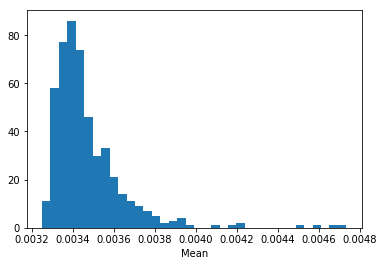

In [64]:
std, mean=hist_rel_err_mean_std(np.exp(rec_gains[:]), sim_gains[::2]) # take the exponential
#of recovered gains because LogCal returns logarithm of the gains

plt.hist(mean,'auto') 
plt.xlabel('Mean')
#plt.xscale('log')
plt.show()

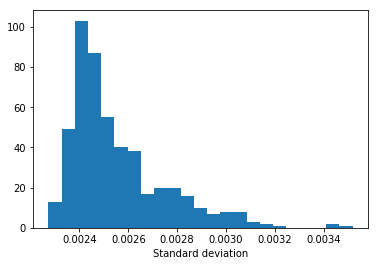

In [66]:
plt.hist(std,'auto') 
plt.xlabel('Standard deviation')
#plt.xscale('log')
plt.show()